In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data = pd.read_csv('data/studentData.csv')
x = data[['c1','c2']]
y = data['admit']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print('accuracy:', accuracy_score(y_test,y_pred))
print('confusion mtx:', confusion_matrix(y_test, y_pred))
print('report:', classification_report(y_test,y_pred))

accuracy: 0.84
confusion mtx: [[ 8  1]
 [ 3 13]]
report:               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.93      0.81      0.87        16

    accuracy                           0.84        25
   macro avg       0.83      0.85      0.83        25
weighted avg       0.86      0.84      0.84        25



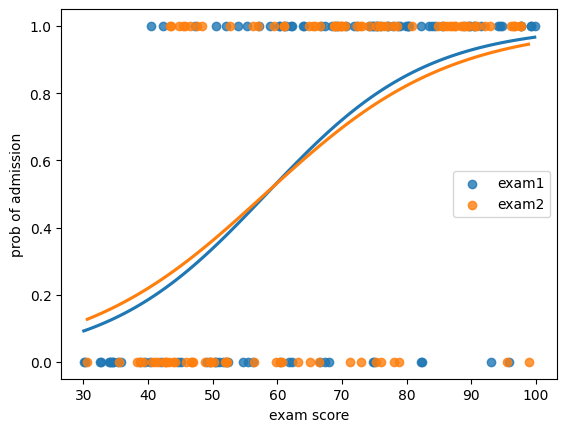

In [13]:
sns.regplot(x=x['c1'], y=y, logistic=True, ci=None, label='exam1')
sns.regplot(x=x['c2'], y=y, logistic=True, ci=None, label='exam2')
plt.xlabel('exam score')
plt.ylabel('prob of admission')
plt.legend()
plt.show()

In [15]:
fpr,tpr, threshold = roc_curve(y_test,y_pred)
roc_auc = roc_auc_score(y_test,y_pred) 

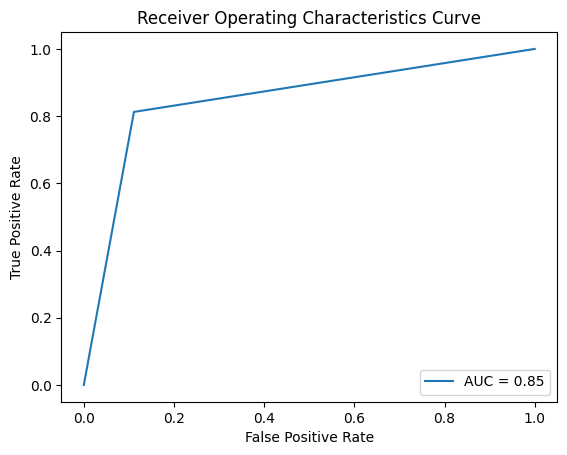

In [ ]:
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.title('Receiver Operating Characteristics Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()